Use Random Forest to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [46]:
# import libraries
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# uploading dataset
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [7]:
Fraud_check=pd.read_csv("Fraud_check.csv")
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# **EDA**

In [8]:
Fraud_check.shape

(600, 6)

In [9]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
Fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [11]:
# cheching for duplicates
Fraud_check[Fraud_check.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [12]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
Fraud_check["TaxInc"] = pd.cut(Fraud_check["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [13]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [14]:
Fraud_check['TaxInc'].value_counts()

Good     476
Risky    124
Name: TaxInc, dtype: int64

In [15]:
Fraud_check.drop(['Taxable.Income'],axis=1,inplace=True)
Fraud_check.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [18]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check['TaxInc']= label_encoder.fit_transform(Fraud_check['TaxInc'])

In [19]:
Fraud_check

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
0,NO,Single,50047,10,YES,0
1,YES,Divorced,134075,18,YES,0
2,NO,Married,160205,30,YES,0
3,YES,Single,193264,15,YES,0
4,NO,Married,27533,28,NO,0
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,0
596,YES,Divorced,55369,2,YES,0
597,NO,Divorced,154058,0,YES,0
598,YES,Married,180083,17,NO,0


In [20]:
Fraud_check['TaxInc'].value_counts()

0    476
1    124
Name: TaxInc, dtype: int64

In [21]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check['Undergrad']= label_encoder.fit_transform(Fraud_check['Undergrad'])
Fraud_check['Marital.Status']= label_encoder.fit_transform(Fraud_check['Marital.Status'])
Fraud_check['Urban']= label_encoder.fit_transform(Fraud_check['Urban'])


In [22]:
Fraud_check

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


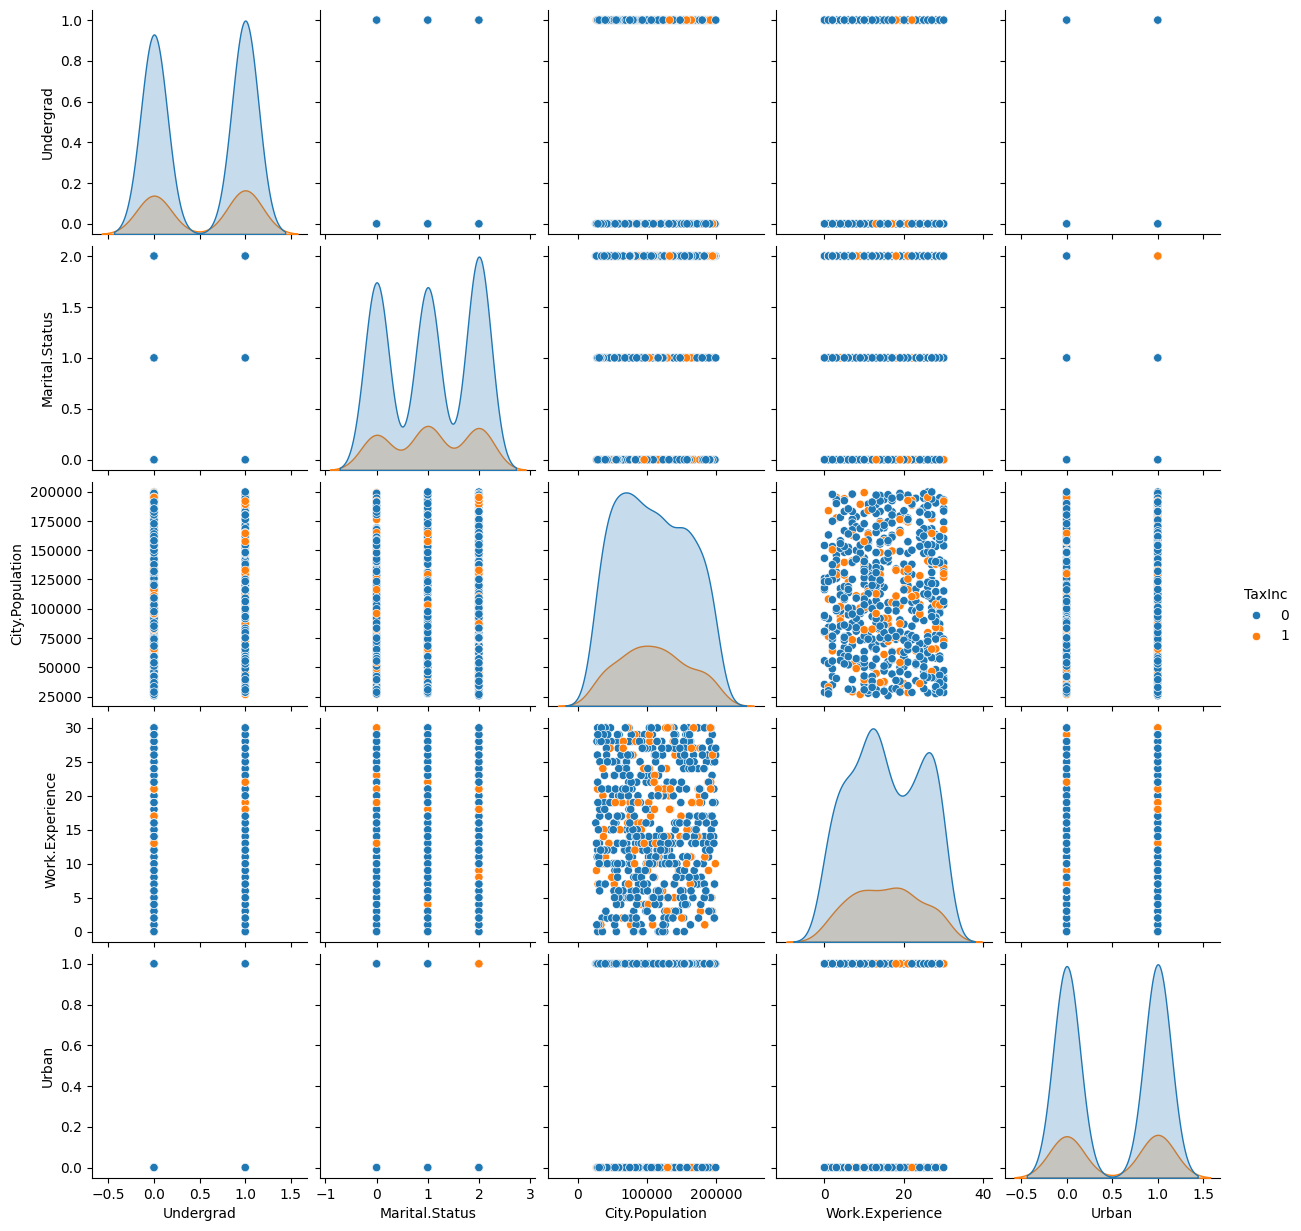

In [23]:
import seaborn as sns
sns.pairplot(data=Fraud_check, hue = 'TaxInc')

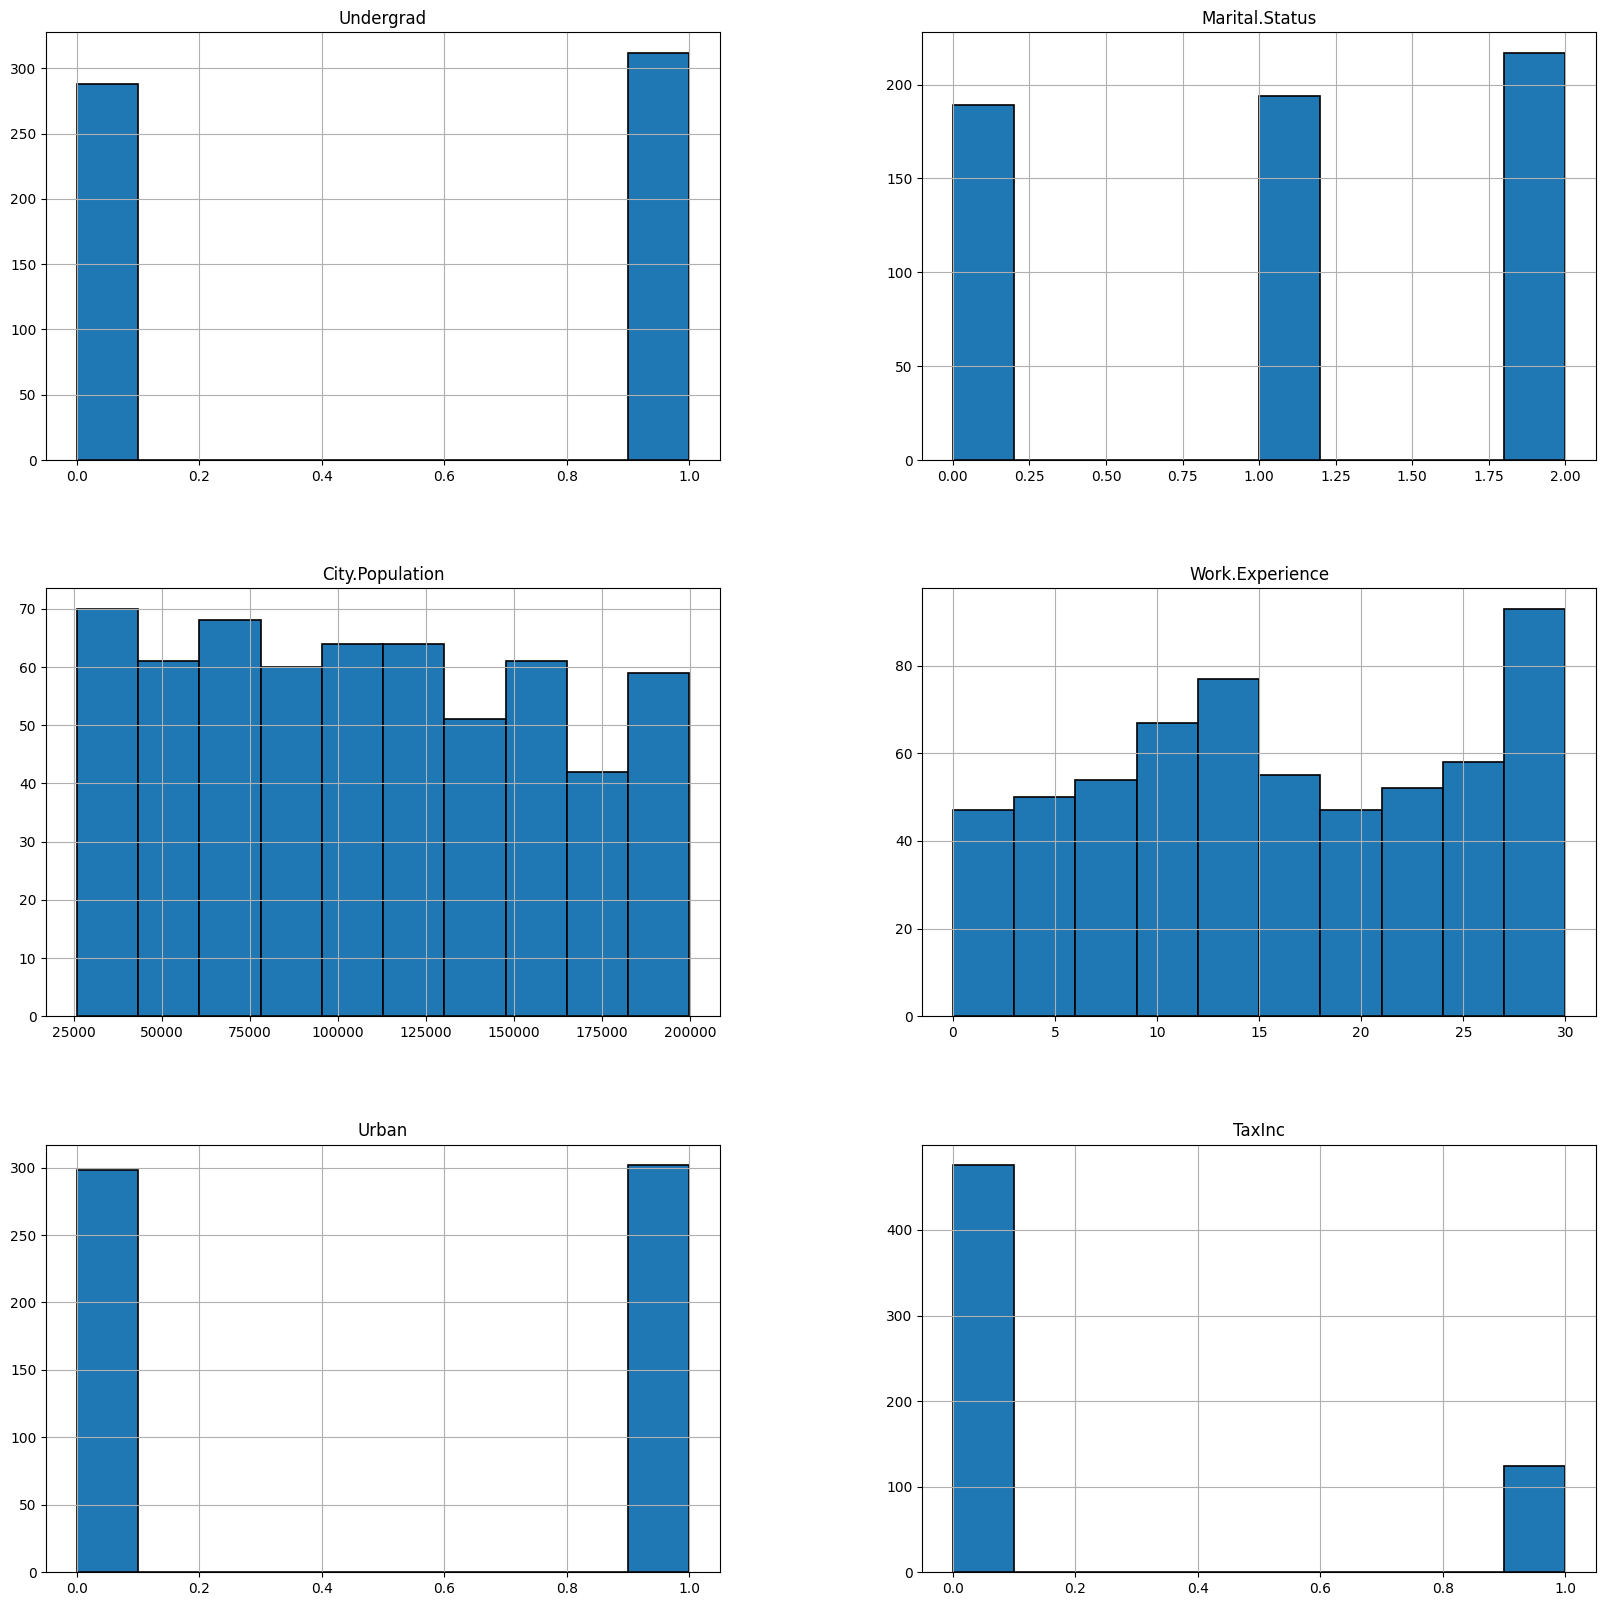

In [44]:
Fraud_check.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [45]:
corr=Fraud_check.corr()
corr

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
TaxInc,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


<Axes: >

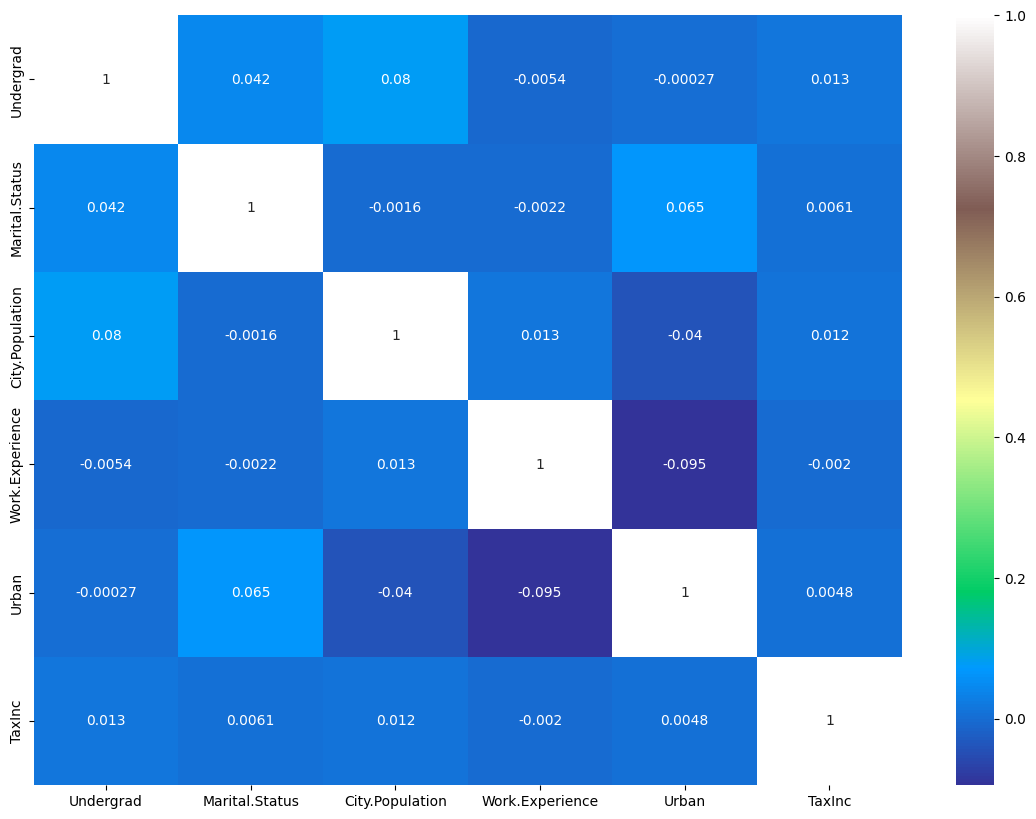

In [47]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(Fraud_check.corr(),annot=True,cmap='terrain')

In [24]:
x=Fraud_check.iloc[:,0:5]
y=Fraud_check['TaxInc']

In [27]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [28]:
x = norm_func(x.iloc[:,0:])
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TaxInc, Length: 600, dtype: int64

# **Model building using Random forest**

In [30]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

In [31]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)

In [33]:
results

array([0.75      , 0.65      , 0.81666667, 0.8       , 0.73333333,
       0.71666667, 0.71666667, 0.65      , 0.78333333, 0.76666667])

In [34]:
print(results.mean())

0.7383333333333333


# **Bagged Decision Trees for Classification**

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10, random_state=7, shuffle=True) # evaluation method
cart = DecisionTreeClassifier()
num_trees = 100

In [40]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7) #Classifier
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7433333333333333


# **AdaBoost Classification**

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)

In [43]:
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7933333333333332
